In [6]:
#1
import csv
attributes = [['Sunny','Rainy'],['Warm','Cold'],['Normal','High'],['Strong','Weak'],['Warm','Cool'],['Same','Change']]

num_attributes = len(attributes);

print(" \n The most general hypothesis:['?','?','?','?','?','?']\n")
print(" \n The most specific hypothesis:['0','0','0','0','0','0']\n")

a = []
print("\n The given training data set: \n")
with open('c1.csv','r') as csvFile:
    reader = csv.reader(csvFile)
    for row in reader:
        a.append(row)
        print(row)
        
print("\n The initial value of hypothesis:")
hypothesis = ['0'] * num_attributes
print(hypothesis)

for j in range(0,num_attributes):
    hypothesis[j] = a[0][j]
    
print("\n Find S:Finding a maximally specific hypothesis\n")
for i in range(0,len(a)):
    if a[i][num_attributes]=='Y':
        for j in range(0,num_attributes):
            if a[i][j]!= hypothesis[j]:
                hypothesis[j]= '?'
            else:
                hypothesis[j] = a[i][j]
    print("For training example number: {0} the hypothesis is ".format(i),hypothesis)
print("\nThe maximally specific hypothesis for a given training examples: \n")
print(hypothesis)

 
 The most general hypothesis:['?','?','?','?','?','?']

 
 The most specific hypothesis:['0','0','0','0','0','0']


 The given training data set: 

['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same', 'Y']
['Sunny', 'Warm', 'High', 'Strong', 'Warm', 'Same', 'Y']
['Rainy', 'Cold', 'High', 'Strong', 'Warm', 'Change', 'N']
['Sunny', 'Warm', 'High', 'Strong', 'Cool', 'Change', 'Y']

 The initial value of hypothesis:
['0', '0', '0', '0', '0', '0']

 Find S:Finding a maximally specific hypothesis

For training example number: 0 the hypothesis is  ['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same']
For training example number: 1 the hypothesis is  ['Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same']
For training example number: 2 the hypothesis is  ['Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same']
For training example number: 3 the hypothesis is  ['Sunny', 'Warm', '?', 'Strong', '?', '?']

The maximally specific hypothesis for a given training examples: 

['Sunny', 'Warm', '?', 'Strong', '?',

In [33]:
#2
import pandas as pd
import numpy as np
import csv
data=pd.DataFrame(data=pd.read_csv('enjoysport.csv'))
concepts=np.array(data.iloc[:,0:-1])
print(concepts)
target=np.array(data.iloc[:,-1])
print(target)

def learn(concepts,target):
    specific_h=concepts[0].copy()
    print('initial specific and general_h')
    print('specific_h is: ',specific_h)
    general_h=[["?" for i in range(len(specific_h))] for i in range(len(specific_h))]
    print('general_h is ',general_h)
    for i,h in enumerate(concepts):
        if target[i]=='yes':
            for x in range(len(specific_h)):
                if h[x]!=specific_h[x]:
                    specific_h[x]='?'
                    general_h[x][x]='?'
        if target[i]=='no':
            for x in range(len(specific_h)):
                if h[x]!=specific_h[x]:
                    general_h[x][x]=specific_h[x]
                else:
                    general_h[x][x]='?'
        print('Steps in candidate elimination algorithm',i+1)
        print(specific_h)
        print(general_h)
    indices=[i for i,val in enumerate(general_h)if val==['?','?','?','?','?','?']]
    for i in indices:
        general_h.remove(['?','?','?','?','?','?'])
    return specific_h,general_h
s_final,g_final=learn(concepts,target)
print('final specific_h is ',s_final,sep="\n")
print('final general_h is ',g_final,sep="\n")

[['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
 ['sunny' 'warm' 'high' 'strong' 'warm' 'same']
 ['rainy' 'cold' 'high' 'strong' 'warm' 'change']
 ['sunny' 'warm' 'high' 'strong' 'cool' 'change']]
['yes' 'yes' 'no' 'yes']
initial specific and general_h
specific_h is:  ['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
general_h is  [['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]
Steps in candidate elimination algorithm 1
['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]
Steps in candidate elimination algorithm 2
['sunny' 'warm' '?' 'strong' 'warm' 'same']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?'

In [34]:
#-----2----(small one)
import csv
s=[0,0,0,0,0,0]
g=["?","?","?","?","?","?"]
p=["?","?","?","?","?","?"]
def gen():
    for k in range(1,len(i)-1):
        if i[k]!=s[k-1]:
            g[k-1]=s[k-1]
with open("c2.csv") as csvfile:
    csvreader=csv.reader(csvfile)
    for i in csvreader:
        if i[7]=="Y":
            if s[0]==0:
                s=i[1:7]
            else:
                for k in range(1,len(i)-1):
                    if i[k]!=s[k-1]:
                        s[k-1]="?"            
        else:     
            gen()
    gen()  
    print("Specific Hypothesis :\n",s)
    print("General Hypothesis :")
    for i in range(0,len(g)):
        if(g[i]!="?"):
            p[i]=g[i]
            print(p)
        p[i]="?"

Specific Hypothesis :
 ['sunny', 'warm', '?', 'strong', '?', '?']
General Hypothesis :
['sunny', '?', '?', '?', '?', '?']
['?', 'warm', '?', '?', '?', '?']


In [4]:
#4
import numpy as np 

X = np.array(([2, 9], [1, 5], [3, 6]), dtype=float) 
y = np.array(([92], [86], [89]), dtype=float)

X = X/np.amax(X,axis=0) 
y = y/100

def sigmoid(x):
    return 1/(1 + np.exp(-x))
def sigmoid_grad(x):
    return x * (1 - x)


epoch=1000
eta =0.2
input_neurons = 2 
hidden_neurons = 3
output_neurons = 1


wh=np.random.uniform(size=(input_neurons,hidden_neurons))
bh=np.random.uniform(size=(1,hidden_neurons)) 
wout=np.random.uniform(size=(hidden_neurons,output_neurons))
bout=np.random.uniform(size=(1,output_neurons))

for i in range(epoch):

    h_ip=np.dot(X,wh) + bh
    h_act = sigmoid(h_ip) 
    o_ip=np.dot(h_act,wout) + bout
    output = sigmoid(o_ip)


    Eo = y-output
    outgrad = sigmoid_grad(output)
    d_output = Eo* outgrad

   
    Eh = d_output.dot(wout.T)
    hiddengrad = sigmoid_grad(h_act) 
    d_hidden = Eh * hiddengrad
    
    wout += h_act.T.dot(d_output) *eta
    wh += X.T.dot(d_hidden) *eta

print("Normalized Input: \n" + str(X))
print("Actual Output: \n" + str(y))
print("Predicted Output: \n" ,output)

Normalized Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.89486261]
 [0.88141731]
 [0.89400001]]


In [8]:
#------6------
import pandas as pd

msg = pd.read_csv('data6.csv', names=['message', 'label'])
print("Total Instances of Dataset: ", msg.shape[0])
msg['labelnum'] = msg.label.map({'pos': 1, 'neg': 0})

X = msg.message
y = msg.labelnum

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)
count_v = CountVectorizer()

X_train_dm = count_v.fit_transform(X_train)
X_test_dm = count_v.transform(X_test)

df = pd.DataFrame(X_train_dm.toarray(), columns=count_v.get_feature_names())

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train_dm, y_train)
pred = clf.predict(X_test_dm)

for doc, p in zip(X_train, pred):
    p = 'pos' if p == 1 else 'neg'
    print(f"{doc} -> {p}")
    
from sklearn.metrics import (accuracy_score, confusion_matrix, precision_score, recall_score)
print('Accuracy Metrics: \n')
print('Accuracy: ', accuracy_score(y_test, pred))
print('Recall: ', recall_score(y_test, pred))
print('Precision: ', precision_score(y_test, pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, pred))

Total Instances of Dataset:  8
We will have good fun tomorrow -> pos
I love this sandwich -> pos
Accuracy Metrics: 

Accuracy:  0.5
Recall:  1.0
Precision:  0.5
Confusion Matrix: 
 [[0 1]
 [0 1]]


In [10]:
#7
import numpy as np
import pandas as pd
import csv 
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.models import BayesianModel
from pgmpy.inference import VariableElimination

heartDisease = pd.read_csv('heart.csv')
heartDisease = heartDisease.replace('?',np.nan)

print('Sample instances from the dataset are given below')
print(heartDisease.head())

print('\n Attributes and datatypes')
print(heartDisease.dtypes)

model= BayesianModel([('age','heartdisease'),('sex','heartdisease'),('exang','heartdisease'),('cp','heartdisease'),('heartdisease','restecg'),('heartdisease','chol')])
print('\nLearning CPD using Maximum likelihood estimators')
model.fit(heartDisease,estimator=MaximumLikelihoodEstimator)

print('\n Inferencing with Bayesian Network:')
HeartDiseasetest_infer = VariableElimination(model)

print('\n 1. Probability of HeartDisease given evidence= restecg')
q1=HeartDiseasetest_infer.query(variables=['heartdisease'],evidence={'restecg':1})
print(q1)

print('\n 2. Probability of HeartDisease given evidence= cp ')
q2=HeartDiseasetest_infer.query(variables=['heartdisease'],evidence={'cp':2})
print(q2)

Sample instances from the dataset are given below
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  heartdisease  
0   0     1             1  
1   0     2             1  
2   0     2             1  
3   0     2             1  
4   0     2             1  

 Attributes and datatypes
age               int64
sex               int64
cp                int64
trestbps          int64
chol              int64
fbs               int64
restecg           int64
thalach           int64
exang             int64
oldpeak         float64
slope             int64
ca  

Eliminating: exang: 100%|██████████| 5/5 [00:00<00:00, 95.72it/s]


 Inferencing with Bayesian Network:

 1. Probability of HeartDisease given evidence= restecg
+-----------------+---------------------+
| heartdisease    |   phi(heartdisease) |
+=================+=====================+
| heartdisease(0) |              0.4242 |
+-----------------+---------------------+
| heartdisease(1) |              0.5758 |
+-----------------+---------------------+

 2. Probability of HeartDisease given evidence= cp 



Eliminating: exang: 100%|██████████| 5/5 [00:00<00:00, 239.12it/s]

+-----------------+---------------------+
| heartdisease    |   phi(heartdisease) |
+=================+=====================+
| heartdisease(0) |              0.3755 |
+-----------------+---------------------+
| heartdisease(1) |              0.6245 |
+-----------------+---------------------+


In [21]:
#-----9------
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

iris=datasets.load_iris()
print("Iris Data set loaded...")

x_train, x_test, y_train, y_test = train_test_split(iris.data,iris.target,test_size=0.1)
print("Dataset is split into training and testing...")
print("Size of trainng data and its label",x_train.shape,y_train.shape)
print("Size of testing data and its label",x_test.shape, y_test.shape)

for i in range(len(iris.target_names)):
    print("Label", i , "-",str(iris.target_names[i]))

classifier = KNeighborsClassifier(n_neighbors=1)

classifier.fit(x_train, y_train)

y_pred=classifier.predict(x_test)

print("Results of Classification using KNN with K=1 ")
for r in range(0,len(x_test)):
    print(" Sample:", str(x_test[r]), " Actual-label:", str(y_test[r]), " Predicted-label:",str(y_pred[r]))
print("Classification Accuracy :" , classifier.score(x_test,y_test));
cm=confusion_matrix(y_test,y_pred)
print('confusion matrix\n',cm)
print('correct prediction\n',accuracy_score(y_test,y_pred))
print('wrong prediction\n',(1-accuracy_score(y_test,y_pred)))

Iris Data set loaded...
Dataset is split into training and testing...
Size of trainng data and its label (135, 4) (135,)
Size of testing data and its label (15, 4) (15,)
Label 0 - setosa
Label 1 - versicolor
Label 2 - virginica
Results of Classification using KNN with K=1 
 Sample: [6.1 2.8 4.  1.3]  Actual-label: 1  Predicted-label: 1
 Sample: [6.  3.4 4.5 1.6]  Actual-label: 1  Predicted-label: 1
 Sample: [7.7 3.8 6.7 2.2]  Actual-label: 2  Predicted-label: 2
 Sample: [6.3 2.9 5.6 1.8]  Actual-label: 2  Predicted-label: 2
 Sample: [4.8 3.4 1.6 0.2]  Actual-label: 0  Predicted-label: 0
 Sample: [5.1 3.8 1.9 0.4]  Actual-label: 0  Predicted-label: 0
 Sample: [7.  3.2 4.7 1.4]  Actual-label: 1  Predicted-label: 1
 Sample: [6.3 2.5 5.  1.9]  Actual-label: 2  Predicted-label: 2
 Sample: [4.9 3.  1.4 0.2]  Actual-label: 0  Predicted-label: 0
 Sample: [5.2 3.5 1.5 0.2]  Actual-label: 0  Predicted-label: 0
 Sample: [5.7 2.9 4.2 1.3]  Actual-label: 1  Predicted-label: 1
 Sample: [5.  3.  1.6 

In [15]:
#------9--------(small change from the above one)
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import datasets

iris=datasets.load_iris()

x=iris.data
y=iris.target

print('sepal-length','sepal-width','petal-length','petal-width')
print(x)
print('class: 0-Iris-Setosa, 1-Iris-Versicolour, 2-Iris_Virginica')
print(y)

x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.3)

classifier =KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train , y_train)

y_pred=classifier.predict(x_test)

print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred))
print('Accuracy Metrics')
print(classification_report(y_test,y_pred))
print('correct prediction\n',accuracy_score(y_test,y_pred))
print('wrong prediction\n',(1-accuracy_score(y_test,y_pred)))

sepal-length sepal-width petal-length petal-width
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]


In [24]:
#5th program
import csv,random,math
import statistics as st
def loadCsv(filename):
    lines=csv.reader(open(filename,"r"))
    dataset=list(lines)
    for i in range(len(dataset)):
        dataset[i]=[float(x) for x in dataset[i]]
    return dataset
def splitdataset(dataset,splitratio):
    testsize=int(len(dataset)*splitratio)
    trainset=list(dataset)
    testset=[]
    while len(testset)<testsize:
        index=random.randrange(len(trainset))
        testset.append(trainset.pop(index))
    return[trainset,testset]
def separatebyclass(dataset):
    separated={}
    for i in range(len(dataset)):
        x=dataset[i]
        if(x[-1] not in separated):
            separated[x[-1]]=[]
        separated[x[-1]].append(x)
    return separated
def compute_mean_std(dataset):
    mean_std=[(st.mean(attribute),st.stdev(attribute))
             for attribute in zip(*dataset)];
    del mean_std[-1]
    return mean_std
def summarizebyclass(dataset):
    separated=separatebyclass(dataset)
    summary={}
    for classvalue,instances in separated.items():
        summary[classvalue]=compute_mean_std(instances)
    return summary
def estimate_probability(x,mean,stdev):
    exponent=math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
    return (1/(math.sqrt(2*math.pi)*stdev))*exponent
def calculateclassprobabilities(summaries,testVector):
    p={}
    for classvalue,classsummaries in summaries.items():
        p[classvalue]=1
        for i in range(len(classsummaries)):
            mean,stdev=classsummaries[i]
            x=testVector[i]
            p[classvalue]*=estimate_probability(x,mean,stdev)
    return p
def predict(summaries,testVector):
    all_p=calculateclassprobabilities(summaries,testVector)
    bestLabel,bestProb=None,-1
    for lbl,p in all_p.items():
        if bestLabel is None or p > bestProb:
            bestProb=p
            bestLabel=lbl
    return bestLabel
def perform_classification(summaries,testset):
    predictions=[]
    for i in range(len(testset)):
        result=predict(summaries,testset[i])
        predictions.append(result)
    return predictions

def get_accuracy(testset,predictions):
    correct=0
    for i in range(len(testset)):
        if testset[i][-1]==predictions[i]:
            correct+=1
    return (correct/float(len(testset)))*100.0
        
dataset = loadCsv('data5.csv');
print('Total instances avaialable',len(dataset))
print('total attrbutes present',len(dataset[0])-1)
print('frst 5 instances')
for i in range(5):
    print(i+1,":",dataset[i])
splitratio=0.2
trainingset,testset=splitdataset(dataset,splitratio)
print('total trainset is {0}\n test set is {1}\n'.format(len(trainingset),len(testset)))
summaries=summarizebyclass(trainingset)
predictions=perform_classification(summaries,testset)
accuracy=get_accuracy(testset,predictions)
print('accuracy is:',accuracy)

Total instances avaialable 768
total attrbutes present 8
frst 5 instances
1 : [6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0, 1.0]
2 : [1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0, 0.0]
3 : [8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0, 1.0]
4 : [1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0, 0.0]
5 : [0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0, 1.0]
total trainset is 615
 test set is 153

accuracy is: 73.20261437908496


Observation: 


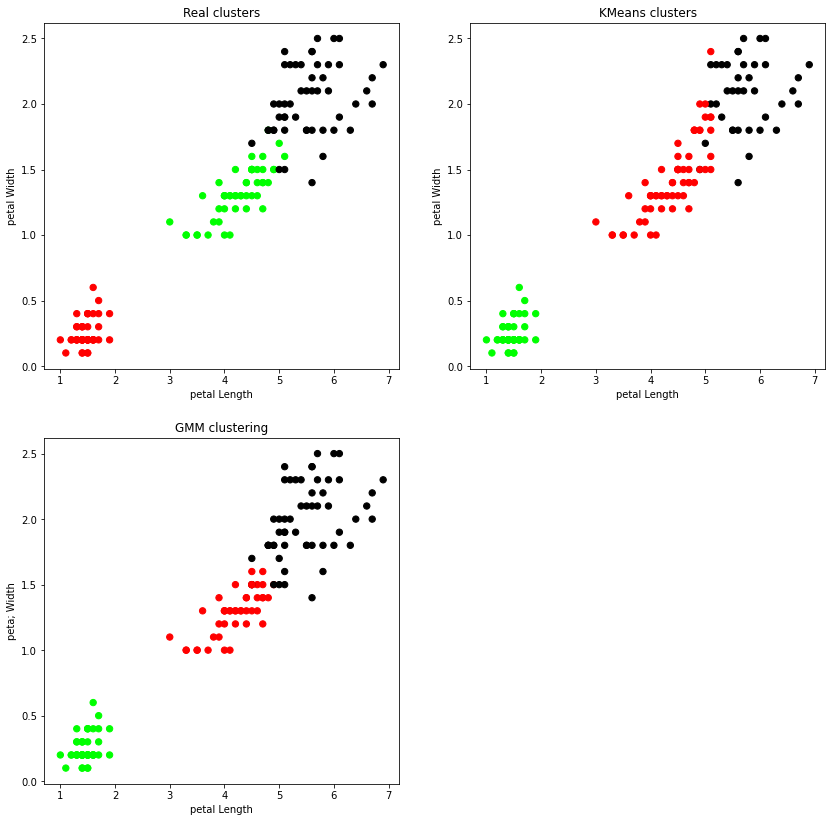

In [25]:
#-------8-------
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn import datasets

iris=datasets.load_iris()
X=pd.DataFrame(iris.data)
X.columns=['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y=pd.DataFrame(iris.target)
y.columns=['Targets']

model=KMeans(n_clusters=3)
model.fit(X)
plt.figure(figsize=(14,14))
colormap=np.array(['red','lime','black'])

plt.subplot(2,2,1)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y.Targets],s=40)
plt.title('Real clusters')
plt.xlabel('petal Length')
plt.ylabel('petal Width')

plt.subplot(2,2,2)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[model.labels_],s=40)
plt.title('KMeans clusters')
plt.xlabel('petal Length')
plt.ylabel('petal Width')

from sklearn import preprocessing
scaler=preprocessing.StandardScaler()
scaler.fit(X)
xsa=scaler.transform(X)
xs=pd.DataFrame(xsa,columns=X.columns)

from sklearn.mixture import GaussianMixture
gmm=GaussianMixture(n_components=3)
gmm.fit(xs)
gmm_y=gmm.predict(xs)


plt.subplot(2,2,3)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[gmm_y],s=40)
plt.title('GMM clustering')
plt.xlabel('petal Length')
plt.ylabel('peta; Width')
print('Observation: ')

Observation: The GMM using EM algorithm based clustering matched the true labels more closely than the Kmeans.


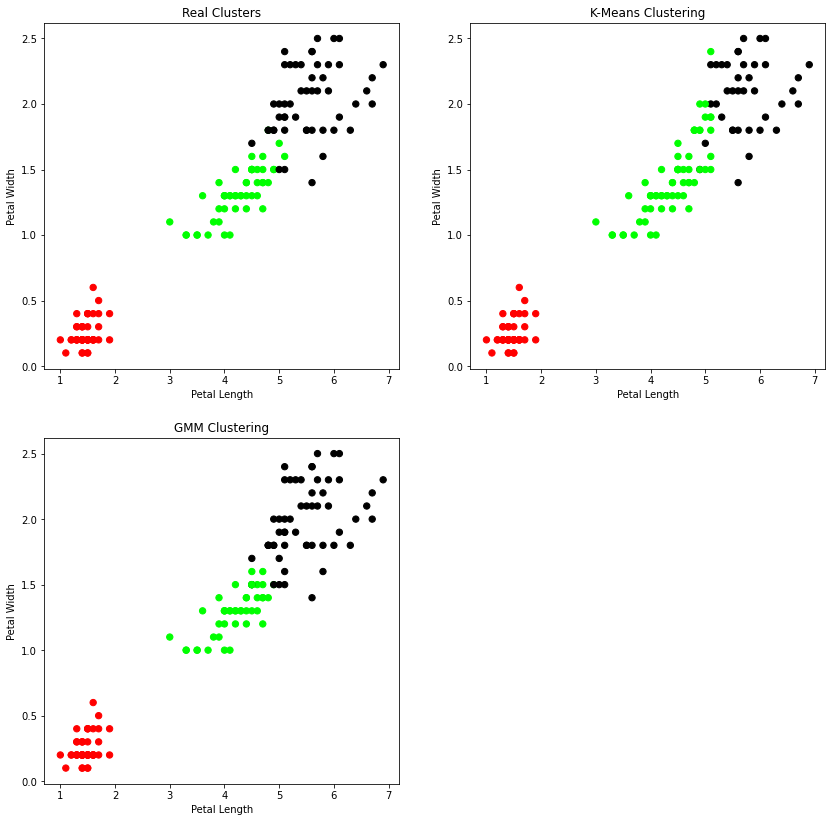

In [26]:
#-----8------(backup)
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
# import some data to play with
iris = datasets.load_iris()
X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y = pd.DataFrame(iris.target)
y.columns = ['Targets']
# Build the K Means Model
model = KMeans(n_clusters=3)
model.fit(X) # model.labels_ : Gives cluster no for which samples belongs to
# # Visualise the clustering results
plt.figure(figsize=(14,14))
colormap = np.array(['red', 'lime', 'black'])
# Plot the Original Classifications using Petal features
plt.subplot(2, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Clusters')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
# Plot the Models Classifications
plt.subplot(2, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model.labels_], s=40)
plt.title('K-Means Clustering')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
# General EM for GMM
from sklearn import preprocessing
# transform your data such that its distribution will have a
# mean value 0 and standard deviation of 1.
scaler = preprocessing.StandardScaler()
scaler.fit(X)
xsa = scaler.transform(X)
xs = pd.DataFrame(xsa, columns = X.columns)
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(xs)
gmm_y = gmm.predict(xs)
plt.subplot(2, 2, 3)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[gmm_y], s=40)
plt.title('GMM Clustering')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
print('Observation: The GMM using EM algorithm based clustering matched the true labels more closely than the Kmeans.')

In [29]:
#--------10----------
import numpy as np
from bokeh.plotting import figure, show, output_notebook
from bokeh.layouts import gridplot
from bokeh.io import push_notebook

def local_regression(x0, X, Y, tau):
 x0 = np.r_[1, x0] 
 X = np.c_[np.ones(len(X)), X]


 xw = X.T * radial_kernel(x0, X, tau) 

 beta = np.linalg.pinv(xw @ X) @ xw @ Y 


 return x0 @ beta 


def radial_kernel(x0, X, tau):
 return np.exp(np.sum((X - x0) ** 2, axis=1) / (-2 * tau * tau))


n = 1000

X = np.linspace(-3, 3, num=n)
print("The Data Set ( 10 Samples) X :\n",X[1:10])
Y = np.log(np.abs(X ** 2 - 1) + .5)
print("The Fitting Curve Data Set (10 Samples) Y :\n",Y[1:10])

X += np.random.normal(scale=.1, size=n)
print("Normalised (10 Samples) X :\n",X[1:10])

domain = np.linspace(-3, 3, num=300)
print(" Xo Domain Space(10 Samples) :\n",domain[1:10])


def plot_lwr(tau):
 prediction = [local_regression(x0, X, Y, tau) for x0 in domain]
 plot = figure(plot_width=400, plot_height=400)
 plot.title.text='tau=%g' % tau
 plot.scatter(X, Y, alpha=.3)
 plot.line(domain, prediction, line_width=2, color='red')
 return plot

show(gridplot([ [plot_lwr(10.), plot_lwr(1.)],
 [plot_lwr(0.1), plot_lwr(0.01)]]))
#it displays graph as output in new tab

The Data Set ( 10 Samples) X :
 [-2.99399399 -2.98798799 -2.98198198 -2.97597598 -2.96996997 -2.96396396
 -2.95795796 -2.95195195 -2.94594595]
The Fitting Curve Data Set (10 Samples) Y :
 [2.13582188 2.13156806 2.12730467 2.12303166 2.11874898 2.11445659
 2.11015444 2.10584249 2.10152068]
Normalised (10 Samples) X :
 [-2.93766395 -3.20014448 -2.81381697 -3.09027749 -2.94989231 -2.95078869
 -3.11207646 -2.86608186 -2.81896702]
 Xo Domain Space(10 Samples) :
 [-2.97993311 -2.95986622 -2.93979933 -2.91973244 -2.89966555 -2.87959866
 -2.85953177 -2.83946488 -2.81939799]


In [30]:
#3
import math
import csv

def load_csv(filename):
    lines = csv.reader(open(filename, "r"));
    dataset = list(lines)
    headers = dataset.pop(0)
    return dataset, headers

class Node:
    def __init__(self, attribute):
        self.attribute = attribute
        self.children = []
        self.answer = ""
        
def subtables(data, col, delete):
    dic = {}
    coldata = [ row[col] for row in data]
    attr = list(set(coldata))
    
    for k in attr:
        dic[k] = []
        
    for y in range(len(data)):
        key = data[y][col]
        if delete:
            del data[y][col]
        dic[key].append(data[y])
        
    return attr, dic

def entropy(S):
    attr = list(set(S))
    if len(attr) == 1: #if all are +ve/-ve then entropy = 0
        return 0
    
    counts = [0,0] # Only two values possible 'yes' or 'no'
    for i in range(2):
        counts[i] = sum( [1 for x in S if attr[i] == x] ) / (len(S) * 1.0)
    
    sums = 0
    for cnt in counts:
        sums += -1 * cnt * math.log(cnt, 2)
    return sums

def compute_gain(data, col):
    attValues, dic = subtables(data, col, delete=False)
    
    total_entropy = entropy([row[-1] for row in data])
    
  
    for x in range(len(attValues)):
        ratio = len(dic[attValues[x]]) / ( len(data) * 1.0)
        entro = entropy([row[-1] for row in dic[attValues[x]]])
        total_entropy -= ratio*entro
    return total_entropy

def build_tree(data, features):
    lastcol = [row[-1] for row in data]
    if (len(set(lastcol))) == 1: # If all samples have same labels return that label
        node=Node("")
        node.answer = lastcol[0]
        return node
    n = len(data[0])-1
    gains = [compute_gain(data, col) for col in range(n) ]
    split = gains.index(max(gains)) # Find max gains and returns index
    node = Node(features[split]) # 'node' stores attribute selected
    #del (features[split])
    fea = features[:split]+features[split+1:]
    
    attr, dic = subtables(data, split, delete=True) # Data will be spilt in subtables
    for x in range(len(attr)):
        child = build_tree(dic[attr[x]], fea)
        node.children.append((attr[x], child))
    return node

def print_tree(node, level):
    if node.answer != "":
        print(" "*level, node.answer) # Displays leaf node yes/no
        return
    print(" "*level, node.attribute) # Displays attribute Name
    for value, n in node.children:
        print(" "*(level+1), value)
        print_tree(n, level + 2)
        
def classify(node,x_test,features):
    if node.answer != "":
        print(node.answer)
        return

    pos = features.index(node.attribute)
    for value, n in node.children:
        if x_test[pos]==value:
            classify(n,x_test,features)
        
dataset, features = load_csv("PlayTennis.csv")
node = build_tree(dataset, features)

print("The decision tree for the dataset using ID3 algorithm is ")
print_tree(node, 0)

testdata, features = load_csv("PlayTennisTestData.csv")
for xtest in testdata:
    print("The test instance : ",xtest)
    print("The predicted label : ", end="")
    classify(node,xtest,features)

The decision tree for the dataset using ID3 algorithm is 
 Outlook
  sunny
   Temperature
    mild
     Humidity
      high
       no 
      normal
       yes 
    cool
     yes 
    hot
     no
  overcast
   yes 
  rain
   Wind
    weak
     yes 
    strong
     Temperature
      mild
       no
      cool
       no 
The test instance :  ['sunny', 'cool', 'normal', 'weak ']
The predicted label : yes 
The test instance :  ['sunny', 'mild', 'normal', 'strong']
The predicted label : yes 
The test instance :  ['overcast', 'mild', 'high', 'strong ']
The predicted label : yes 
The test instance :  ['overcast', 'hot', 'normal', 'weak ']
The predicted label : yes 
The test instance :  ['rain', 'mild', 'high', 'strong']
The predicted label : no
The test instance :  ['rain', 'mild', 'normal', 'weak']
The predicted label : yes 
The test instance :  ['sunny', 'mild', 'high', 'weak']
The predicted label : no 
